Spanish Predict with KNN
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Correct:8 Total:132
Spanish Predict with SVM
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Correct:8 Total:132
Spanish Predict with MLP
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Correct:8 Total:132
English Predict with KNN
[0 0 0 ... 0 0 0]
Correct:2206 To

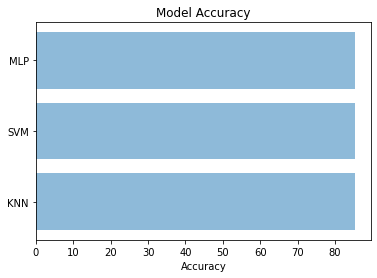

In [ ]:
from itertools import count
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
english_file = open("english.txt")
#german_file = open("german.txt")
german_file = open("german.txt", 'r', encoding='iso-8859-15')
spanish_file = open("spanish.txt")
english_lines = english_file.readlines()
german_lines = german_file.readlines()
spanish_lines = spanish_file.readlines()

def count_occurrences(arr, num):
    count = 0
    for i in arr:
        if i == num:
            count += 1
    return count

# randomly split the data into 80% training set and 20% test set

training_dataset_english = []
target_dataset_english = []
training_dataset_spanish = []
training_dataset_german = []
target_dataset_spanish = []
target_dataset_german = []
train_data = []
train_data_english = []
train_data_spanish = []
train_data_german = []
test_data = []
target_data = []
test_data_english = []
test_data_spanish = []
test_data_german = []
for line in english_lines:
    line = line.replace('\n', '')

    if len(line) == 5:
        training_dataset_english.append([ord(char) for char in line])
        target_dataset_english.append(0)
for line in german_lines:
    line = line.replace('\n', '')

    if len(line) == 5:
        training_dataset_german.append([ord(char) for char in line])
        target_dataset_german.append(1)
for line in spanish_lines:
    line = line.replace('\n', '')

    if len(line) == 5:
        training_dataset_spanish.append([ord(char) for char in line])
        target_dataset_spanish.append(2)


train_data_english, test_data_english = train_test_split(training_dataset_english, test_size=0.2, random_state=87)
target_train_english, target_test_english = train_test_split(target_dataset_english, test_size=0.2, random_state=87)
train_data_spanish, test_data_spanish = train_test_split(training_dataset_spanish, test_size=0.2, random_state=87)
target_train_spanish, target_test_spanish = train_test_split(target_dataset_spanish, test_size=0.2, random_state=87)
train_data_german, test_data_german = train_test_split(training_dataset_german, test_size=0.2, random_state=87)
target_train_german, target_test_german = train_test_split(target_dataset_german, test_size=0.2, random_state=87)

train_data = train_data_english + train_data_spanish + train_data_german
test_data = test_data_english + test_data_spanish + test_data_german
target_data = target_train_english + target_train_spanish + target_train_german



# print the sizes of the training and test sets
#print(f"english train: {len(training_dataset_english)}")
#print(f"English target: {len(target_dataset_english)}")
#print(f"Training set size: {len(train_data)}")
#print(f"Test set size: {len(test_data)}")
#print("First 10 training data:")
#for word in train_data[:10]: print(word)


#print(f"\nFirst 10 target data:")
#for word in target_dataset[:10]: print(word)


#training
knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()
knn_model.fit(train_data, target_data)
svm_model.fit(train_data, target_data)
mlp_nn.fit(train_data, target_data)
#testing
print(f"Spanish Predict with KNN")
print(knn_model.predict(test_data_spanish))
num_to_find = 2
count = count_occurrences(knn_model.predict(test_data_spanish), num_to_find)
print(f"Correct:{count} Total:{len(test_data_spanish)}")

print(f"Spanish Predict with SVM")
print(svm_model.predict(test_data_spanish))
num_to_find = 2
count_SVM_Span = count_occurrences(knn_model.predict(test_data_spanish), num_to_find)
print(f"Correct:{count_SVM_Span} Total:{len(test_data_spanish)}")

print(f"Spanish Predict with MLP")
print(mlp_nn.predict(test_data_spanish))
num_to_find = 2
count_MLP_Span = count_occurrences(knn_model.predict(test_data_spanish), num_to_find)
print(f"Correct:{count_MLP_Span} Total:{len(test_data_spanish)}")

print(f"English Predict with KNN")
print(knn_model.predict(test_data_english))
num_to_find = 0
count_english = count_occurrences(knn_model.predict(test_data_english), num_to_find)
print(f"Correct:{count_english} Total:{len(test_data_english)}")

print(f"English Predict with SVM")
print(svm_model.predict(test_data_english))
num_to_find = 0
count_english_SVM = count_occurrences(knn_model.predict(test_data_english), num_to_find)
print(f"Correct:{count_english_SVM} Total:{len(test_data_english)}")

print(f"English Predict with MLP")
print(mlp_nn.predict(test_data_english))
num_to_find = 0
count_english_MLP = count_occurrences(knn_model.predict(test_data_english), num_to_find)
print(f"Correct:{count_english_MLP} Total:{len(test_data_english)}")

print(f"German Predict with KNN")
print(knn_model.predict(test_data_german))
num_to_find = 1
count_german = count_occurrences(knn_model.predict(test_data_german), num_to_find)
print(f"Correct:{count_german} Total:{len(test_data_german)}")

print(f"German Predict with SVM")
print(svm_model.predict(test_data_german))
num_to_find = 1
count_german_SVM = count_occurrences(knn_model.predict(test_data_german), num_to_find)
print(f"Correct:{count_german_SVM} Total:{len(test_data_german)}")

print(f"German Predict with MLP")
print(mlp_nn.predict(test_data_german))
num_to_find = 1
count_german_MLP = count_occurrences(knn_model.predict(test_data_german), num_to_find)
print(f"Correct:{count_german_MLP} Total:{len(test_data_german)}")


correct_SVM = count_SVM_Span + count_english_SVM + count_german_SVM
correct_knn = count + count_english + count_german
correct_MLP = count_english_MLP + count_MLP_Span + count_german_MLP
Total_knn = len(test_data_english) + len(test_data_spanish) + len(test_data_german)
print(f"Correct:{correct_knn}")
print(f"Total:{Total_knn}")
print("The percent accuracy of KNN is:")
print(f"{round(((correct_knn/Total_knn)*100),2)}%")
print("The percent accuracy of SVM is:")
print(f"{round(((correct_SVM/Total_knn)*100),2)}%")
print("The percent accuracy of MLP is:")
print(f"{round(((correct_MLP/Total_knn)*100),2)}%")
labels = ("KNN", "SVM", "MLP")

# Numbers that you want the bars to represent
value = [(correct_knn/Total_knn)*100, (correct_SVM/Total_knn)*100, (correct_MLP/Total_knn)*100]

# Title of the plot
plt.title("Model Accuracy")

# Label for the x values of the bar graph
plt.xlabel("Accuracy")

# Drawing the bar graph
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align="center", alpha=0.5)
plt.yticks(y_pos, labels)

# Display the graph
plt.show()


